## Installation

In [88]:
!pip install --upgrade langchain_google_vertexai unstructured unstructured[pdf] langchain-community langchain_google_community opencv-python==4.9.0.80 google-cloud-vision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: unstructured
    Found existing installation: unstructured 0.15.9
    Uninstalling unstructured-0.15.9:
      Successfully uninstalled unstructured-0.15.9
  Attempting uninstall: unstructured-inference
    Found existing installation: unstructured-inference 0.7.36
    Uninstalling unstructured-inference-0.7.36:
      Successfully uninstalled unstructured-inference-0.7.36


In [1]:
!apt-get install -y poppler-utils libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libleptonica-dev is already the newest version (1.82.0-3build1).
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-script-latn is already the newest version (1:4.00~git30-7274cfa-1.1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
python3-pil is already the newest version (9.0.1-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [2]:
# Authenticate with Colab (if you're using Google Colab)

import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

from google.auth import default
creds, _ = default()

In [3]:
# Set your project and region
PROJECT_ID = "opcworks"  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}
LOCATION = "global"  # @param {type:"string"}

## Multimodal Gemini

In [58]:
from langchain_google_vertexai import ChatVertexAI
chat_vision_model = ChatVertexAI(model_name="gemini-pro-vision", project=PROJECT_ID)

In [59]:
from langchain_core.messages import HumanMessage, AIMessage

question1 = HumanMessage(content="Hello. Who are you?")
answer1 = chat_vision_model.invoke([question1])
print(answer1.content)

question2 = HumanMessage(content="What kind of input and output do you support")
answer2 = chat_vision_model.invoke([question1, answer1, question2])

I am Gemini, a multi-modal AI model, developed by Google.


In [60]:
print(answer2.content)

**Input:**
* **Text:** I can understand and generate human language in over 100 languages.
* **Code:** I can understand and generate code in over 100 programming languages.
* **Images:** I can generate and edit images, including realistic photos, abstract art, and photorealistic images.
* **Audio:** I can generate and edit audio, including music, sound effects, and human speech.
* **Video:** I can generate and edit videos, including realistic videos, abstract art, and photorealistic videos.

**Output:**
* **Text:** I can generate text in a variety of styles, including creative writing, news articles, essays, and code.
* **Code:** I can generate code in a variety of programming languages, including Python, Java, C++, and JavaScript.
* **Images:** I can generate images in a variety of styles, including realistic photos, abstract art, and photorealistic images.
* **Audio:** I can generate audio in a variety of styles, including music, sound effects, and human speech.
* **Video:** I can ge

In [37]:
image_url = "gs://cloud-samples-data/vision/label/wakeupcat.jpg"
image_message_part = {
    "type": "image_url",
    "image_url": {"url": image_url}
}

message = HumanMessage(content=["What is shown in this image?", image_message_part])

output = chat_vision_model.invoke([message])
print(output.content)

 This is an image of an orange cat with its mouth wide open and its eyes closed. It is standing in front of a window and there are some blinds behind it. The cat has a collar with a tag on it. The image is captioned "Wake up human!"


In [38]:
image_url = "gs://cloud-samples-data/vision/label/wakeupcat.jpg"
image_message_part = {
    "type": "image_url",
    "image_url": {"url": image_url}
}

message = HumanMessage(content=["What is shown in this image?", image_message_part])

output = chat_vision_model.invoke([message])
print(output.content)

 This is an image of an orange cat yawning with its mouth wide open. The cat is sitting on a table or counter in front of a window. The window has blinds that are partially closed. There is a cat tree next to the window. There are some shelves on the wall behind the cat. The cat is wearing a collar with a tag on it. The tag has a heart on it. The cat is looking at the camera. The image is taken at a close-up angle.


In [44]:
llm = ChatVertexAI(model_name="gemini-2.0-flash-001", project=PROJECT_ID)
audio_uri = "gs://cloud-samples-data/generative-ai/audio/audio_summary_clean_energy.mp3"
audio_message_part = {
    "type": "media",
    "file_uri": audio_uri,
    "mime_type": "audio/mp3",
}
text_message_part = {"type": "text", "text": "Describe the attached media in 5 words!"}
message = HumanMessage(content=[audio_message_part, text_message_part])
result =  llm.invoke([message])
print(result.content)

Google, geothermal, carbon-free, sustainability, innovation.


## Imagen

### Image captioning

First, let's try ImageGen model for image captioning - we'll ask the model to describe the content of the image with human language.

Let's look at a random public image:

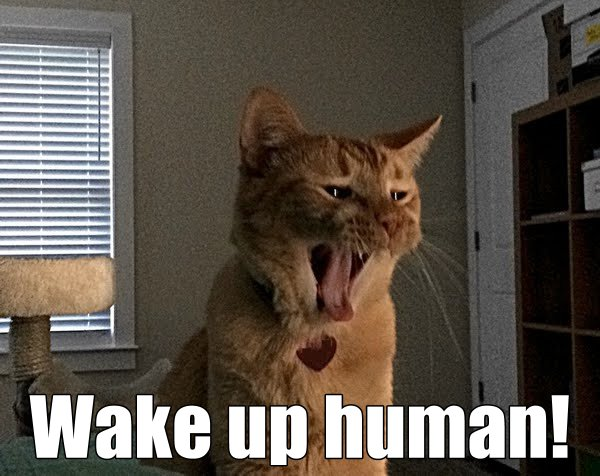

In [61]:
from langchain_google_vertexai._image_utils import ImageBytesLoader
from vertexai.vision_models import Image

image_loader = ImageBytesLoader()
image = image_loader.load_bytes(image_url)
Image(image).show()

And ask Imagen to describe it:

In [72]:
from langchain_google_vertexai import VertexAIImageCaptioning, VertexAIImageCaptioningChat
model_ic = VertexAIImageCaptioning(project=PROJECT_ID)
response = model_ic.invoke(image_url)
print(response)

ValueError: Unable to find your project. Please provide a project ID by:
- Passing a constructor argument
- Using vertexai.init()
- Setting project using 'gcloud config set project my-project'
- Setting a GCP environment variable
- To create a Google Cloud project, please follow guidance at https://developers.google.com/workspace/guides/create-project

As a reminder, so far it's the same functionality you can achieve with Gemini. Let's compare:

In [66]:
llm = ChatVertexAI(model_name="gemini-1.5-pro-001", project=PROJECT_ID)
audio_uri = "gs://cloud-samples-data/generative-ai/audio/audio_summary_clean_energy.mp3"
audio_message_part = {
    "type": "media",
    "file_uri": audio_uri,
    "mime_type": "audio/mp3",
}
text_message_part = {"type": "text", "text": "Describe the attached media in 5 words!"}
message = HumanMessage(content=[audio_message_part, text_message_part])
result =  llm.invoke([message])
print(result.content)

Geothermal energy powers Google Cloud. 



Now let's ask some questions about the image. Please, note that despite the interface looks similar to chat models, it only allows a single-turn chat:

In [76]:
from langchain_google_vertexai import VertexAIVisualQnAChat
model_qa = VertexAIVisualQnAChat(project=PROJECT_ID)

message_qa = HumanMessage(content=[image_message_part, "What is shown in this image?"])
answer = model_qa.invoke([message_qa])
print(answer.content)

message_qa1 = HumanMessage(content=[image_message_part, "What is the cat doing?"])
answer1 = model_qa.invoke([message_qa1])
print(answer1.content)

ValueError: Unable to find your project. Please provide a project ID by:
- Passing a constructor argument
- Using vertexai.init()
- Setting project using 'gcloud config set project my-project'
- Setting a GCP environment variable
- To create a Google Cloud project, please follow guidance at https://developers.google.com/workspace/guides/create-project

In [82]:
from langchain_google_vertexai import VertexAIImageGeneratorChat
model_generate = VertexAIImageGeneratorChat(project=PROJECT_ID)

message_gen = HumanMessage(content=["Generate an image with a yawning cat."])
answer = model_generate.invoke([message_gen])
image_loader = ImageBytesLoader()
image = image_loader.load_bytes(answer.content[0]["image_url"]["url"])
Image(image).show()

ValueError: Unable to find your project. Please provide a project ID by:
- Passing a constructor argument
- Using vertexai.init()
- Setting project using 'gcloud config set project my-project'
- Setting a GCP environment variable
- To create a Google Cloud project, please follow guidance at https://developers.google.com/workspace/guides/create-project

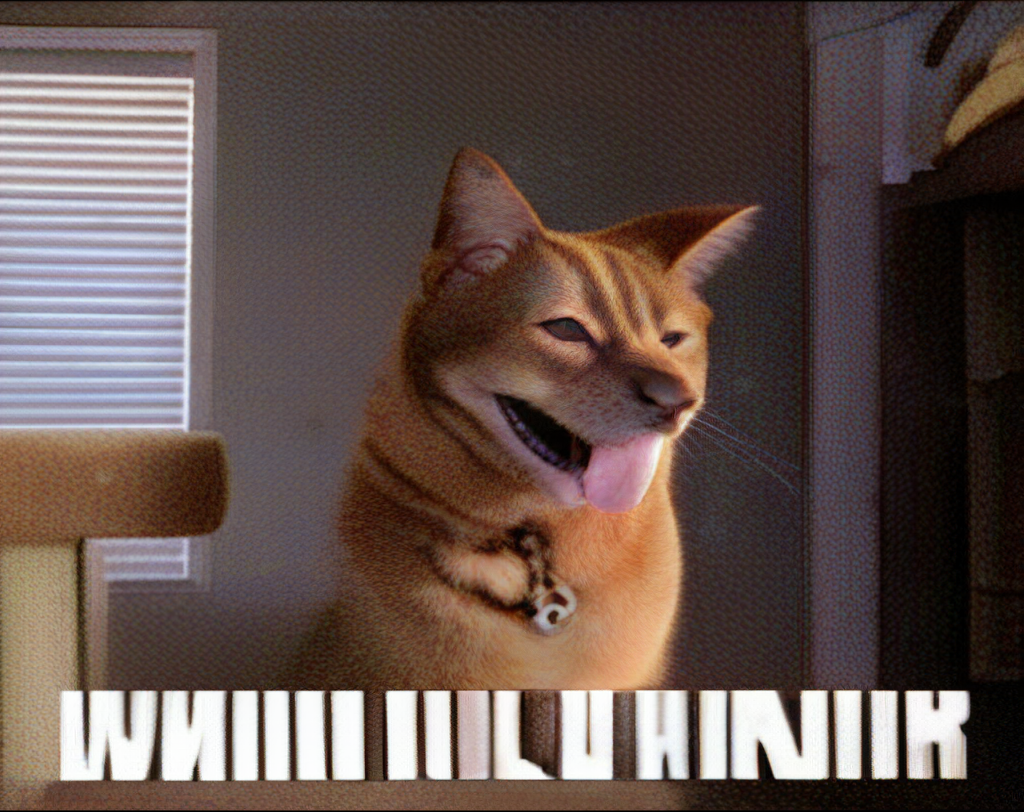

In [ ]:
from langchain_google_vertexai import VertexAIImageEditorChat
model_edit = VertexAIImageEditorChat()

message_edit = HumanMessage(content=[image_message_part, "Replace a cat with a dog."])
answer = model_edit.invoke([message_edit])
image_loader = ImageBytesLoader()
image = image_loader.load_bytes(answer.content[0]["image_url"]["url"])
Image(image).show()

## Parse pdfs

In [4]:
from langchain_community.document_loaders import UnstructuredPDFLoader, PyPDFLoader, UnstructuredImageLoader
from langchain_google_community import GCSFileLoader
from unstructured.partition.pdf import partition_pdf

Let's copy the report we'd like to parse:

In [5]:
!gsutil cp gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs/2022_alphabet_annual_report.pdf .

Copying gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs/2022_alphabet_annual_report.pdf...
/ [1 files][  9.7 MiB/  9.7 MiB]                                                
Operation completed over 1 objects/9.7 MiB.                                      


Now let's created a function to parse the pdf with unstructred library and extract all various elements (incl. tables and images) from it:

In [6]:
def load_pdf(file_path: str):
  """Uses Unstructured library to load pdf and extract images."""
  file_name = file_path.split("/")[-1]
  return partition_pdf(
    filename=file_path,
    extract_images_in_pdf=True,
    chunking_strategy="by_title",
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=False,
    extract_image_block_output_dir=f"./extracted_images/{file_name}"
  )


And let's run it (we need to wait until it finishes, it make take up to 1-2 hours):

In [ ]:
partition = load_pdf("./2022_alphabet_annual_report.pdf")

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

Now let's go through all extracted elements, take only tables and create a separate collection of LangChain documents:

In [ ]:
from unstructured.documents.elements import CompositeElement, Table
from langchain_core.documents import Document

file_path = "gen-app-builder/search/alphabet-investor-pdfs/2022_alphabet_annual_report.pdf"

documents = []
elements = partition

prev_doc, prev_table = None, None

for i, element in enumerate(elements):
  if isinstance(element, CompositeElement):
    if prev_table:
      documents.append(prev_table)
      prev_table = None
    if not prev_doc:
      prev_doc = Document(page_content=element.text, metadata={"source": file_path, "page": element.metadata.page_number, "element": "text"})
    else:
      if prev_doc.metadata["page"] == element.metadata.page_number:
        prev_doc.page_content += element.text
      else:
        documents.append(prev_doc)
        prev_doc = Document(page_content=element.text, metadata={"source": file_path, "page": element.metadata.page_number, "element": "text"})
  if isinstance(element, Table):
    if prev_doc:
      documents.append(prev_doc)
      prev_doc = None
    if element.metadata.is_continuation:
      prev_table.page_content += element.text
    else:
      if prev_table:
        documents.append(prev_table)
      prev_table = Document(page_content=element.text, metadata={"source": file_path, "page": element.metadata.page_number, "element": "table"})

if prev_table:
  documents.append(prev_table)
if prev_doc:
  documents.append(prev_doc)

We can now save these documents to a folder:

In [ ]:
import json

for i, d in enumerate(documents):
  with open(f"./documents/document_{i}.json", "w") as f:
    json.dump(d.to_json(), f)

And if needed, that's how we deserialize them back from the folder:

In [ ]:
import os
import json
from langchain_core.load import loads

documents = []
folder_path = "./documents"
for path in os.listdir(folder_path):
  full_path = os.path.join(folder_path, path)
  with open(full_path, 'r') as f:
    document = json.load(f)
    documents.append(loads(json.dumps(document)))

And we can also copy extracted images to the GCS bucket so that we can easier pass a link to an image to the model later

In [ ]:
!gsutil -m cp -R gs://${BUCKET}/langchain/chapter8/example1/extracted_images .

## Build RAG

## Create index

Let's create three vector indices - one only for texts, one for texts + text description of images, and the last one for images only:

In [ ]:
display_names = [
    "multimodal_example_lc_texts",
    "multimodal_example_lc_example1",
    "multimodal_example_lc_example3"]
descriptions = [
    "Chapter 8 LangChain on Google Cloud",
    "Chapter 8 LangChain on Google Cloud (text + images)",
    "Chapter 8 LangChain on Google Cloud (image only)"]
dimensions = [768, 768, 1408]

In [ ]:
from google.cloud import aiplatform

indices = []

for name, description, dim in zip(display_names, descriptions, dimensions):
  index = aiplatform.MatchingEngineIndex.create_tree_ah_index(
      display_name=name,
      dimensions=dim,
      approximate_neighbors_count=150,
      leaf_node_embedding_count=500,
      leaf_nodes_to_search_percent=7,
      index_update_method="STREAM_UPDATE",
      description=description,
  )
  indices.append(index)

index_raw, index_mixed, index_images = indices

We also need to create an index endpoint:

In [ ]:
index_endpoint = aiplatform.MatchingEngineIndexEndpoint.create(
    display_name="multimodal_example_endpoint",
    description="Chapter 8 LangChain on Google Cloud Endpoint",
    public_endpoint_enabled=True,
)

INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:Creating MatchingEngineIndexEndpoint
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:Create MatchingEngineIndexEndpoint backing LRO: projects/370809539165/locations/us-central1/indexEndpoints/2307624218050691072/operations/3283470508875579392
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:MatchingEngineIndexEndpoint created. Resource name: projects/370809539165/locations/us-central1/indexEndpoints/2307624218050691072
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:To use this MatchingEngineIndexEndpoint in another session:
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:index_endpoint = aiplatform.MatchingEngineIndexEndpoint('projects/370809539165/locations/us-central1/indexEndpoints/2307624218050691072')


And deploy our indices to this endpoint:

In [ ]:
for index in indices:
  _ = index_endpoint.deploy_index(
    index=index, deployed_index_id=index.display_name
    )

In [ ]:
endpoint_id = index_endpoint.name
raw_index_id = indices[0].index
mixed_index_id = indices[1].index
image_index_id = indices[2].index

### Initial RAG

Define some variables here:

In [ ]:
project = "YOUR_PROJECT"
location = "us-central1"
bucket_name = "YOUR BUCKET"
# GCS path where we copied extracted images
prefix = "langchain/chapter8/example1/extracted_images"

In [ ]:
from langchain_google_vertexai import VectorSearchVectorStore
from langchain_google_vertexai import VertexAIEmbeddings

vectorstore_raw = VectorSearchVectorStore.from_components(
    project_id=project,
    region=location,
    gcs_bucket_name=bucket_name,
    index_id=raw_index_id,
    endpoint_id=endpoint_id,
    embedding=VertexAIEmbeddings(model_name="textembedding-gecko@003"),
    stream_update=True
)

In [ ]:
vectorstore_mixed = VectorSearchVectorStore.from_components(
    project_id=project,
    region=location,
    gcs_bucket_name=bucket_name,
    index_id=mixed_index_id,
    endpoint_id=endpoint_id,
    embedding=VertexAIEmbeddings(model_name="textembedding-gecko@003"),
    stream_update=True
)

Add documents to the vectorstore

In [ ]:
_ = vectorstore_raw.add_documents(docs)
_ = vectorstore_mixed.add_documents(docs)

Now, let's create a simple RAG:

In [ ]:
from langchain.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough

from langchain_google_vertexai import ChatVertexAI
from langchain_core.output_parsers import StrOutputParser


prompt = PromptTemplate(
    input_variables=["question", "context"],
    template="Answer the question\n{question}\ngiven the following context:\n{context}\n.",
)

retriever_raw = vectorstore_raw.as_retriever(search_kwargs={"k": 10})

def format_docs(docs):
  f = "\n".join("page: {0}\n{1}".format(doc.metadata.get("page", 0), doc.page_content) for doc in docs)
  return f

chain_rag = (
    {
        "context": retriever_raw | format_docs,
        "question": RunnablePassthrough(),
    }
    | prompt
    | ChatVertexAI(
        temperature=0, model_name="gemini-1.5-pro-001", max_output_tokens=1024)
    | StrOutputParser()
)

And test it on a few questions:

In [ ]:
chain_rag.invoke("What was Alphabet's revenue in 2022?")

'Alphabet\'s revenue in 2022 was **$282.8 billion**. This information is stated on page 65: "Revenues were $282.8 billion, an increase of 10% year over year...". \n'

In [ ]:
chain_rag.invoke("How many startups were supported by the Sustainable Development program?")

'The text provided states that the Startups for Sustainable Development program supports **400 startups**. This information is found on page 31. \n'

In [ ]:
chain_rag.invoke("How many public short views did Youtube have in the last 90days?")

'The provided text does not contain the answer to how many public short views YouTube had in the last 90 days. However, it does mention that YouTube Shorts had 30 billion daily views in 2022. \n'

As we can see, it can answer all questions but the one which answer is "hidden" in the image.

### Multimodal RAG option 1

Let's create a function that uses a LLM to give a textual description of an image:

In [ ]:
def describe_image(llm: ChatVertexAI, image_path: str) -> str:
  """Describes an image with a multimodal LLM."""
  text_message = {
        "type": "text",
        "text": (
            "Your task is to summarize images for retrieval."
            "These summaries will be embedded and used to retrieve "
            "the image that is relevant for the query."
            "Give a concise summary of the image and optimize it "
            "for retrieval.\nIf it's a table, extract all its elements."
            "\nIf it's a graph or a chart, explain the findings in the "
            "graph. Do not include any numbers that are not mentioned in the "
            "image."
        )
  }
  image_message = {
        "type": "image_url",
        "image_url": {"url": image_path},
    }
  message = HumanMessage(content=[text_message, image_message])
  return llm.invoke([message]).content

Let's test it out:

In [ ]:
path_example = "langchain/chapter8/example1/extracted_images/figure-19-26.jpg"

In [ ]:
llm_mm = ChatVertexAI(model_name="gemini-pro-vision", temperature=0.4)
describe_image(llm_mm, f"gs://{bucket_name}/{path_example}")

' Neal Mohan, Chief Product Officer at YouTube, stands in front of a screen with a graph showing 10M valid public Shorts views in the last 90 days.'

Now let's generate description for all the collected images:

In [ ]:
from google.cloud import storage
from langchain_core.documents import Document

storage_client = storage.Client()
bucket = storage_client.bucket(bucket_name)

blobs = bucket.list_blobs(prefix=prefix)

image_docs = []

for blob in blobs:
    full_path = f"gs://{blob.bucket.name}/{blob.path}"
    description = describe_image(llm_mm, full_path)
    image_docs.append(Document(
        page_content=description.content,
        metadata={"source": full_path, "element": "image"}
    ))

And add these generated document to the vectorstore (on top of allready added text documents):

In [ ]:
_ = vectorstore_mixed.add_documents(image_docs)

In [ ]:
retriever_mixed = vectorstore_mixed.as_retriever(search_kwargs={"k": 10})


chain_rag_example1 = (
    {
        "context": retriever_mixed | format_docs,
        "question": RunnablePassthrough(),
    }
    | prompt
    | ChatVertexAI(
        temperature=0, model_name="gemini-1.5-pro-001", max_output_tokens=1024)
    | StrOutputParser()
)

In [ ]:
chain_rag_example1.invoke("How many public short views did Youtube have in the last 90days?")

'YouTube had **10 million** valid public Shorts views in the last 90 days. \n'

### Multimodal RAG option 2

We are not going to change anything on the indexing and retrieval part, but let’s pass an image itself instead of its description to the RAG

In [ ]:
raw_prompt_template_mm = (
    "Use image or text data or both to answer the question: {question}"
)

def format_mm_docs(docs, question):
  texts = [doc for doc in docs if doc.metadata.get("doc_type") != "image"]
  images = [doc.metadata["source"] for doc in docs if doc.metadata.get("doc_type") == "image"]
  context = "\n".join("page: {0}\n{1}".format(text.metadata.get("page", 0), text.page_content) for text in texts)
  image_messages = []
  for image in images:
    image_message = {
        "type": "image_url",
        "image_url": {"url": image},
    }
    image_messages.append(image_message)
  start_text_message = {
      "type": "text",
      "text": raw_prompt_template_mm.format(question=question),
  }
  text_message = [{
      "type": "text",
      "text": context,
  }] if context else []
  return [HumanMessage(content=[start_text_message]+image_messages+text_message)]

In [ ]:
chain_rag_example2 = (
    {"docs": itemgetter("question") | retriever_mixed,
     "question": RunnablePassthrough()}
    | RunnableLambda(lambda x: format_mm_docs(x["docs"], **x["question"]))
    | ChatVertexAI(
        temperature=0, model_name="gemini-1.5-pro-001", max_output_tokens=1024)
    | StrOutputParser()
)

In [ ]:
chain_rag_example2.invoke(
    {"question": "How many public short views did Youtube have in the last 90days?"})

'YouTube had **10 million** valid public Shorts views in the last 90 days. \n'

### Multimodal RAG option 3

In [ ]:
from langchain_google_vertexai import VertexAIEmbeddings

llm_multimodal = VertexAIEmbeddings(model_name="multimodalembedding")

Alternatively, we could have reduced the dimension size of text and image embeddings to a common ground (to 512):

In [ ]:
llm1 = VertexAIEmbeddings(model_name="text-embedding-004")
r = llm1.embed(["Hello world"], dimensions=512)
print(len(r[0]))

Now let's embedd all images and create LangChain documents:

In [ ]:
from uuid import uuid4

image_paths = [f"gs://{blob.bucket.name}/{blob.name}" for blob in blobs]
image_embeddings = [llm_multimodal.embed_image(path) for path in image_paths]
documents = [Document(page_content=str(uuid4()), metadata={"source": path, "doc_type": "image"}) for path in image_paths]


In [ ]:
from langchain_google_vertexai import VectorSearchVectorStore

vectorstore_images = VectorSearchVectorStore.from_components(
    project_id=project,
    region=location,
    gcs_bucket_name=bucket_name,
    index_id=image_endpoint_id,
    endpoint_id=image_index_id,
    embedding=VertexAIEmbeddings(model_name="multimodalembedding"),
    stream_update=True
)

Let's add images to the vectorstore (with a bulk insert, and keep in mind that we use a different type of storage in that case):

In [ ]:
n = len(image_paths)
ids = vectorstore_images._generate_unique_ids(n)
vectorstore_images._document_storage.mset(list(zip(ids, documents)))

metadatas = [{}] * n

vectorstore_images._searcher.add_to_index(
    ids, image_embeddings, metadatas)

Now let's search for the image given the query:

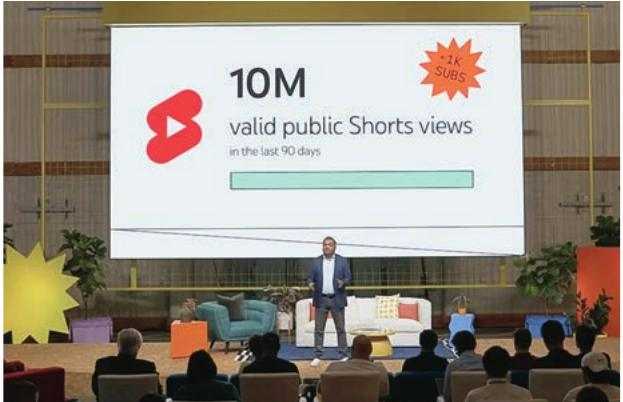

In [ ]:
from langchain_google_vertexai._image_utils import ImageBytesLoader
from vertexai.vision_models import Image

results = vectorstore_images.similarity_search("How many users does Youtube have?")
image_loader = ImageBytesLoader()
image = image_loader.load_bytes(results[0].metadata["source"])
Image(image).show()

Now we need to combine an output of two retrievers:

In [ ]:
from langchain.retrievers import EnsembleRetriever

retriever_raw = vectorstore_raw.as_retriever(search_kwargs={"k": 2})
retriever_images = vectorstore_images.as_retriever(search_kwargs={"k": 1})

ensemble_retriever = EnsembleRetriever(
    retrievers=[retriever_raw, retriever_images], weights=[0.75, 0.25]
)

In [ ]:
from langchain_core.runnables import RunnablePassthrough, RunnableParallel, RunnableLambda
from langchain_text_splitters import RecursiveCharacterTextSplitter

from langchain_google_vertexai import ChatVertexAI
from langchain_core.output_parsers import StrOutputParser
from operator import itemgetter


chain_rag_mm = (
    {"docs": itemgetter("question") | ensemble_retriever,
     "question": RunnablePassthrough()}
    | RunnableLambda(lambda x: format_mm_docs(x["docs"], **x["question"]))
    | ChatVertexAI(
        temperature=0.5, model_name="gemini-1.5-pro-001", max_output_tokens=1024)
    | StrOutputParser()
)

In [ ]:
result = chain_rag_mm.invoke({"question": "How many short views does Youtube have?"})

In [ ]:
print(result)

How many valid public Shorts views were there in the last 90 days? **10 million** 



## Image loader

In [ ]:
from langchain_google_community import CloudVisionParser
parser = CloudVisionParser(project="kuligin-sandbox1")

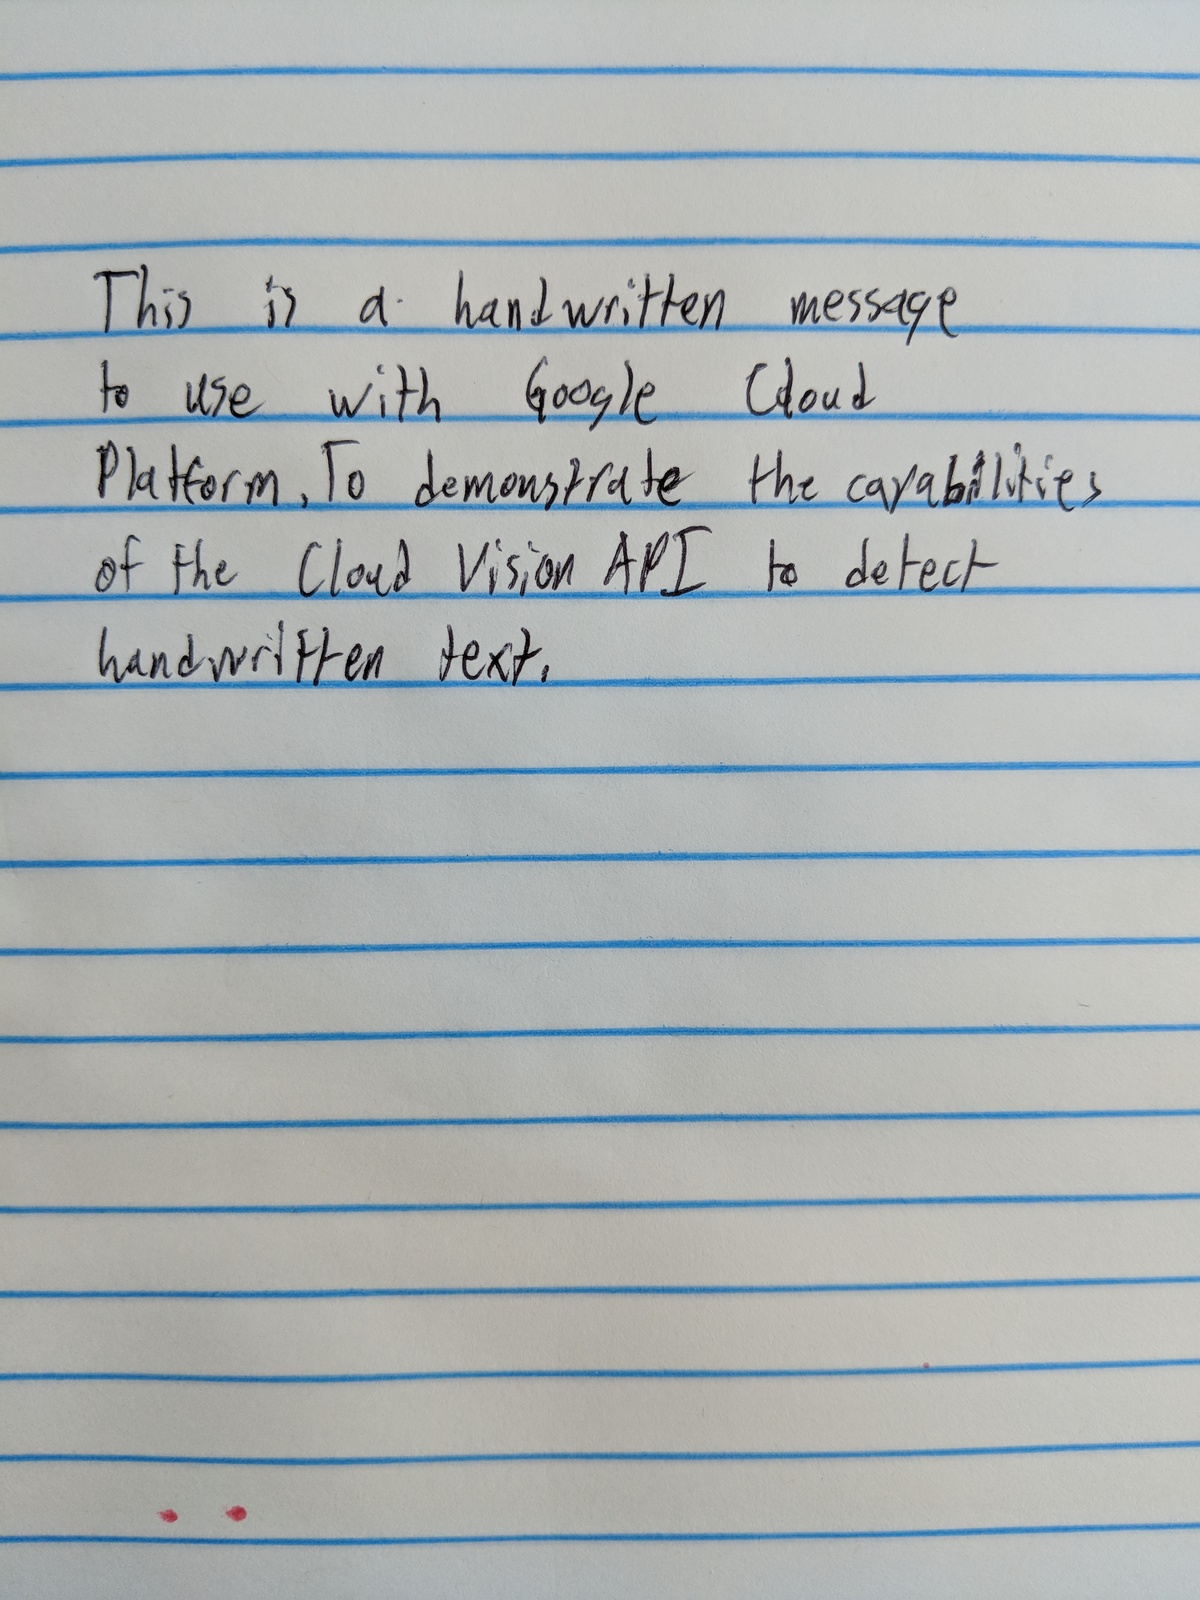

In [ ]:
image_url_text = "gs://cloud-samples-data/vision/handwritten.jpg"

image_loader = ImageBytesLoader()
image = image_loader.load_bytes(image_url_text)
Image(image).show()

In [ ]:
parser.load(image_url_text)

Document(page_content='This is a hand written message\nto use with Google Cloud\nPlatform, To demonstrate the capabilities\nof the Cloud Vision API to detect\nhandwritten text,', metadata={'source': 'gs://cloud-samples-data/vision/handwritten.jpg'})